# IMDB 영화평 분석

## 지도학습 기반

### 데이터 로딩 및 확인

In [24]:
import pandas as pd

review_df = pd.read_csv('./데이터셋/labeledTrainData.tsv', sep='\t',)
print(review_df.shape)
display(review_df.head())

(25000, 3)


,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


### 데이터 전처리
- br태그 삭제
- 알파벳이 아닌 문자 삭제

In [3]:
#print(review_df['review'][0]) #데이터 모양 확인
import re

In [25]:
review_df['review'] = review_df['review'].str.replace('<br />',' ')
review_df['review'] = review_df['review'].apply(lambda x:re.sub('[^a-zA-Z]',' ', x))

In [19]:
print(review_df['review'][0])

With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay   Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring  Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him   The actual feature film bit when it finally starts is only on for   

### 학습 데이터/평가 데이터 분리

In [7]:
x = review_df['review']
y = review_df['sentiment']
from sklearn.model_selection  import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=100, stratify=y)

### 피처벡터화

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

cnt_vect = CountVectorizer(stop_words=stopwords.words('english'), ngram_range=(1,2))
cnt_vect.fit(x_train)
x_train_cnt_vect = cnt_vect.transform(x_train)
x_test_cnt_vect = cnt_vect.transform(x_test)

### 모델 학습 및 평가

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
lr_clf = LogisticRegression(solver='liblinear',C=10)
lr_clf.fit(x_train_cnt_vect, y_train)

y_hat = lr_clf.predict(x_test_cnt_vect)
pred_prob = lr_clf.predict_proba(x_test_cnt_vect)
print(f'정확도:{accuracy_score(y_test, y_hat):.3f}')
print(f'AUC:{roc_auc_score(y_test, pred_prob[:,1]):.3f}')

정확도:0.888
AUC:0.951


# 비지도학습 기반 감성 분석

## WordNet Synset과 SentiWordNet SentiSynset 클래스의 이해

In [9]:
import nltk
# nltk의 모든 데이터 셋과 패키지를 다운로드
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Pac

True

### WordNet 주요 기능 확인
- WordNet은 시맨틱 (문맥상의미) 분석을 제공하는 어휘 사전인디.
- Synsets() : 하나의 단어가 가질 수 있는 여러가지 시맨틱 정보를 Synset 객체로 반환
- Synset 객체 형식 (aaaa.b.c 형식) : aaaa-> 단어이름 , b-> 품사, c-> 같은 품사 그룹의 인덱스

In [10]:
from nltk.corpus import wordnet as wn
term = 'present'
synsets = wn.synsets(term)
print(type(synsets))
print(len(synsets))
print(synsets)

<class 'list'>
18
[Synset('present.n.01'), Synset('present.n.02'), Synset('present.n.03'), Synset('show.v.01'), Synset('present.v.02'), Synset('stage.v.01'), Synset('present.v.04'), Synset('present.v.05'), Synset('award.v.01'), Synset('give.v.08'), Synset('deliver.v.01'), Synset('introduce.v.01'), Synset('portray.v.04'), Synset('confront.v.03'), Synset('present.v.12'), Synset('salute.v.06'), Synset('present.a.01'), Synset('present.a.02')]


In [11]:
for synset in synsets : 
    print(f'#### Synset name: {synset.name()}####')
    print(f'POS : {synset.lexname()}')
    print(f'Definition : {synset.definition()}')
    print()

#### Synset name: present.n.01####
POS : noun.time
Definition : the period of time that is happening now; any continuous stretch of time including the moment of speech

#### Synset name: present.n.02####
POS : noun.possession
Definition : something presented as a gift

#### Synset name: present.n.03####
POS : noun.communication
Definition : a verb tense that expresses actions or states at the time of speaking

#### Synset name: show.v.01####
POS : verb.perception
Definition : give an exhibition of to an interested audience

#### Synset name: present.v.02####
POS : verb.communication
Definition : bring forward and present to the mind

#### Synset name: stage.v.01####
POS : verb.creation
Definition : perform (a play), especially on a stage

#### Synset name: present.v.04####
POS : verb.possession
Definition : hand over formally

#### Synset name: present.v.05####
POS : verb.stative
Definition : introduce

#### Synset name: award.v.01####
POS : verb.possession
Definition : give, especiall

In [ ]:
 - Synset 객체의 path_similarity() 함수를 통해 단어의 상호유사도를 확인할 수 있다.

In [12]:
import pandas as pd

tree = wn.synset('tree.n.01')
lion = wn.synset('lion.n.01')
tiger = wn.synset('tiger.n.02') # tiger.n.01 사납거나 대담한 사람
cat = wn.synset('cat.n.01')
dog = wn.synset('dog.n.01')
entities = [tree, lion, tiger, cat, dog]
similarities = []
entity_names = [ entity.name().split('.')[0] for entity in entities]
import numpy as np
for entity in entities :
    similarity= [np.round(entity.path_similarity(compared_entity),2) for compared_entity in entities]
    similarities.append(similarity)
similarity_df = pd.DataFrame(similarities, columns=entity_names, index=entity_names)    
print(similarity_df)

       tree  lion  tiger   cat   dog
tree   1.00  0.07   0.07  0.08  0.12
lion   0.07  1.00   0.33  0.25  0.17
tiger  0.07  0.33   1.00  0.25  0.17
cat    0.08  0.25   0.25  1.00  0.20
dog    0.12  0.17   0.17  0.20  1.00


### Sentiwordnet의 주요기능 확인
- wordnet과 유사한 기능을 갖는 모듈
- 추가로 단어의 감성을 나타내는 감성지수와 객관성을 나타내는 객관성지수를 제공한다.

In [14]:
from nltk.corpus import sentiwordnet as swn

senti_synsets = list(swn.senti_synsets('slow'))
print(type(senti_synsets))
print(senti_synsets)

<class 'list'>
[SentiSynset('decelerate.v.01'), SentiSynset('slow.v.02'), SentiSynset('slow.v.03'), SentiSynset('slow.a.01'), SentiSynset('slow.a.02'), SentiSynset('dense.s.04'), SentiSynset('slow.a.04'), SentiSynset('boring.s.01'), SentiSynset('dull.s.08'), SentiSynset('slowly.r.01'), SentiSynset('behind.r.03')]


In [15]:
father = swn.senti_synset('father.n.01')
print('긍정감성지수:', father.pos_score())
print('부정감성지수:', father.neg_score())
print('객관성지수:', father.obj_score())

긍정감성지수: 0.0
부정감성지수: 0.0
객관성지수: 1.0


In [16]:
fabulous = swn.senti_synset('fabulous.a.01')
print('긍정감성지수:', fabulous.pos_score())
print('부정감성지수:', fabulous.neg_score())
print('객관성지수:', fabulous.obj_score())

긍정감성지수: 0.875
부정감성지수: 0.125
객관성지수: 0.0


## SentiWordNet을 이용한 영화 감상평 감성 분석
- 분석절차
    1. 문서를 문장 단위로 분해 -> 토큰화
    2. 문장을 단어 단위로 분해 -> 토큰화
    3. 토큰화된 단어의 어근 추출 및 품사 태깅
    4. sentiwordnet을 이용하여 긍정, 부정 감성 지수 구하고 이를 모두 합산 하여 특정 임계치 이상의 경우 긍정으로 그렇지 않으면 부정으로 분류시킨다.

### wordnet 기반의 품사 태그 반환 함수 정의
- POS TABLE
  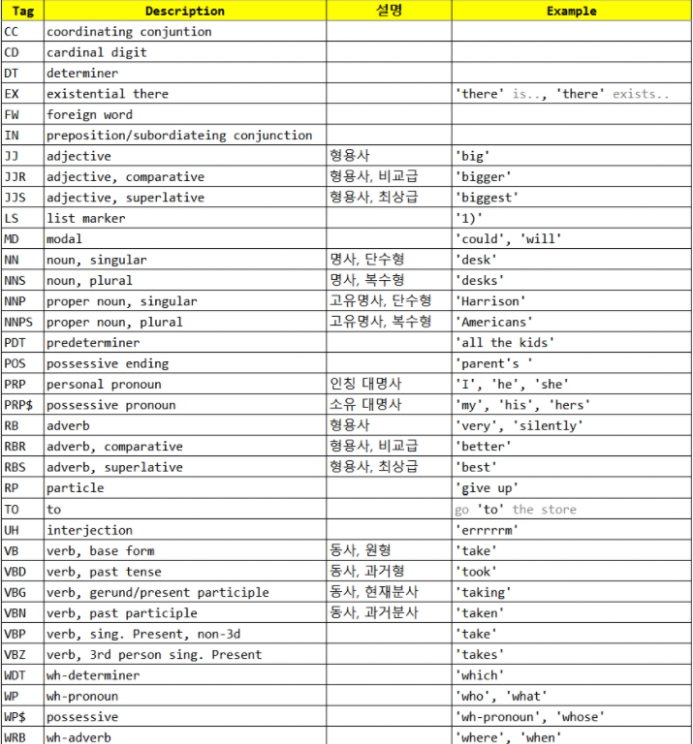

In [17]:
from nltk.corpus import wordnet as wn
# NLTK PennTreeBank Tag를 기반으로 wordnet의 품사 Tag로 변환
def penn_to_wn(tag):
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB

- 감성지수 반환 함수 정의
  >- 각 단어의 긍정 감성 지수와 부정 감성 지수를 모두 합한 총 감성지수가 0이상일 경우 긍정 감성으로 1, 그렇지 않으면 부정 감성 0 값을 반환

In [18]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import sentiwordnet as swn
from nltk import sent_tokenize, word_tokenize, pos_tag
def swn_polarity(text):
    sentiment = 0.0 # 감성지수초기화
    token_count = 0
    lemmartizer = WordNetLemmatizer() # 어근 추출 클래스
    sentences = sent_tokenize(text)
    for sentence in sentences :
        word_tokens = word_tokenize (sentence)
        # pos_tag() : 품사분류, 단어와 품사를 값으로 갖는 튜플 반환
        tagged_sentence = pos_tag(word_tokens)
        for word, tag in tagged_sentence:
            wn_tag = penn_to_wn(tag) # wordNet 기반의 품사로 변환
            if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV ):
                continue
            lemma = lemmartizer.lemmatize(word, pos=wn_tag)
            if not lemma: # 해당하는 어근이 존재하지 않으면 pass
                continue
            synsets = wn.synsets(lemma,pos=wn_tag)
            if not synsets:
                continue
            synset = synsets[0] # 여러 synset 객체 중 가장 첫 번째 단어의 문맥을 대표 synset 객체로 선택
            swn_synset = swn.senti_synset(synset.name()) # synset.name() -> father.n.01 형식 값 반환
            sentiment += (swn_synset.pos_score()-swn_synset.neg_score())
            token_count += 1
    if not token_count:
        return 0
    if sentiment >= 0:
        return 1
    return 0 

- swn_polarity 함수 구조 파악 테스트

In [19]:
text = review_df['review'][0]
#print(text)
sentences = sent_tokenize(text)
#print(len(sentences))
#print(sentence[0])
tagged = pos_tag(word_tokenize(sentences[0]))
print(len(tagged))
print(tagged[0])# 단어와 품사를 튜플로 in 전치사라는 뜻
print(tagged[:10])

437
('With', 'IN')
[('With', 'IN'), ('all', 'PDT'), ('this', 'DT'), ('stuff', 'NN'), ('going', 'VBG'), ('down', 'RP'), ('at', 'IN'), ('the', 'DT'), ('moment', 'NN'), ('with', 'IN')]


### 리뷰에 대한 감성지수 값을 예측 값으로 계산

In [20]:
review_df['preds'] = review_df['review'].apply(lambda x: swn_polarity(x))

### 예측 정확도 확인

In [21]:
y_target = review_df['sentiment'].values # 정답
y_hat = review_df ['preds'].values # 예측값

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
print(confusion_matrix(y_target, y_hat))
print(f'정확도:{accuracy_score(y_target,y_hat):.3f}')
print(f'정밀도:{precision_score(y_target,y_hat):.3f}')
print(f'재현율{recall_score(y_target,y_hat):.3f}')

[[7668 4832]
 [3636 8864]]
정확도:0.661
정밀도:0.647
재현율0.709


# VADER를 이용한 감성 분석
- 소셜 미디어의 감성 분석 용도로 만들어진 감성 사전
- SentimentIntensity Analyzer 객체 이용
- Polarity Scores 함수 : 딕셔너리 형태의 감성 점수 반환
  >- neg:부정감성 지수
  >- neu:중립감성 지수
  >- pos:긍정감성 지수
  >- compound: neg, neu, pos를 적절하게 조합해서 만든 -1~1사이의 감성 지수 (0.1 이상이면 긍정 감성, 미만이면 부정감성으로 판단)

In [33]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
senti_analyzer = SentimentIntensityAnalyzer()
senti_score = senti_analyzer.polarity_scores(review_df['review'][0])
print(senti_score)
print(review_df['sentiment'][0])

{'neg': 0.13, 'neu': 0.743, 'pos': 0.127, 'compound': -0.7943}
1


##  긍정/ 부정 판별 함수 정의

In [34]:
def vader_polarity(review, threshold=0.1):
    analyzer = SentimentIntensityAnalyzer()
    score = analyzer.polarity_scores(review)
    agg_score = score['compound']
    final_sentiment = 1 if agg_score >= threshold else 0
    return final_sentiment

In [35]:
review_df['vader_preds'] = review_df['review'].apply(lambda x:vader_polarity(x))

In [36]:
y_target = review_df['sentiment'].values # 정답
y_hat = review_df ['vader_preds'].values
print(confusion_matrix(y_target, y_hat))
print(f'정확도:{accuracy_score(y_target,y_hat):.3f}')
print(f'정밀도:{precision_score(y_target,y_hat):.3f}')
print(f'재현율{recall_score(y_target,y_hat):.3f}')

[[ 6747  5753]
 [ 1858 10642]]
정확도:0.696
정밀도:0.649
재현율0.851
